In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [21]:
data = pd.read_csv("./data/train_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 98 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Age                                  103904 non-null  float64
 1   Flight Distance                      103904 non-null  float64
 2   Departure Delay in Minutes           103904 non-null  float64
 3   Arrival Delay in Minutes             103904 non-null  float64
 4   Service Score                        103904 non-null  float64
 5   Departure Delay                      103904 non-null  int64  
 6   Arrival Delay                        103904 non-null  int64  
 7   Long Distance Flight                 103904 non-null  int64  
 8   Class_Business                       103904 non-null  int64  
 9   Class_Eco                            103904 non-null  int64  
 10  Class_Eco Plus                       103904 non-null  int64  
 11  Inflight wifi

<div style="
    border: 2px solid #3e4a5a; 
    border-radius: 12px; 
    background: linear-gradient(135deg, #d3d6db, #bfc7d5); 
    padding: 20px; 
    text-align: center; 
    font-family: 'Microsoft YaHei', sans-serif; 
    font-size: 24px; 
    font-weight: bold; 
    color: #2a2a40; 
    box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.2);
">
    <h1 style="margin: 0; font-size: 26px;">Splitting the data 🔧</h1>
</div>


In [22]:
target = data['satisfaction']
data = data.drop(columns=["satisfaction"])

In [23]:
le = LabelEncoder()
target_encoded = le.fit_transform(target)

In [24]:
X = data
y = target_encoded
X.shape, y.shape

((103904, 97), (103904,))

In [25]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

X_train.shape,  X_test.shape 

((93513, 97), (10391, 97))

 <div style="
    border: 2px solid #3e4a5a; 
    border-radius: 12px; 
    background: linear-gradient(135deg, #d3d6db, #bfc7d5); 
    padding: 20px; 
    text-align: center; 
    font-family: 'Microsoft YaHei', sans-serif; 
    font-size: 24px; 
    font-weight: bold; 
    color: #2a2a40; 
    box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.2);
">
    <h1 style="margin: 0; font-size: 26px;">Dummy Model 🔧</h1>
</div>


In [28]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

model = DummyClassifier(strategy="most_frequent")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Dummy Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Dummy Model Accuracy: 0.5678


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[5900    0]
 [4491    0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.72      5900
           1       0.00      0.00      0.00      4491

    accuracy                           0.57     10391
   macro avg       0.28      0.50      0.36     10391
weighted avg       0.32      0.57      0.41     10391

0.5


 <div style="
    border: 2px solid #3e4a5a; 
    border-radius: 12px; 
    background: linear-gradient(135deg, #d3d6db, #bfc7d5); 
    padding: 20px; 
    text-align: center; 
    font-family: 'Microsoft YaHei', sans-serif; 
    font-size: 24px; 
    font-weight: bold; 
    color: #2a2a40; 
    box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.2);
">
    <h1 style="margin: 0; font-size: 26px;">Logistic Regression 🔧</h1>
</div>


In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Accuracy: 0.9348


In [31]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[5562  338]
 [ 340 4151]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5900
           1       0.92      0.92      0.92      4491

    accuracy                           0.93     10391
   macro avg       0.93      0.93      0.93     10391
weighted avg       0.93      0.93      0.93     10391

0.9800561197725016


 <div style="
    border: 2px solid #3e4a5a; 
    border-radius: 12px; 
    background: linear-gradient(135deg, #d3d6db, #bfc7d5); 
    padding: 20px; 
    text-align: center; 
    font-family: 'Microsoft YaHei', sans-serif; 
    font-size: 24px; 
    font-weight: bold; 
    color: #2a2a40; 
    box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.2);
">
    <h1 style="margin: 0; font-size: 26px;">SVM 🔧</h1>
</div>


In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=1.0, class_weight='balanced', probability=True)

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.9629


 <div style="
    border: 2px solid #3e4a5a; 
    border-radius: 12px; 
    background: linear-gradient(135deg, #d3d6db, #bfc7d5); 
    padding: 20px; 
    text-align: center; 
    font-family: 'Microsoft YaHei', sans-serif; 
    font-size: 24px; 
    font-weight: bold; 
    color: #2a2a40; 
    box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.2);
">
    <h1 style="margin: 0; font-size: 26px;">Random Forest 🔧</h1>
</div>


In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Random Forest Accuracy: 0.9595


In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[5562  338]
 [ 340 4151]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5900
           1       0.92      0.92      0.92      4491

    accuracy                           0.93     10391
   macro avg       0.93      0.93      0.93     10391
weighted avg       0.93      0.93      0.93     10391

0.9934933331823723


## Finding the best hyperparameter

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                           param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


 ## Utilizing the best hyperparameter to train model

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=None,min_samples_split=2, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Random Forest Accuracy: 0.9595


In [35]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[5562  338]
 [ 340 4151]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5900
           1       0.92      0.92      0.92      4491

    accuracy                           0.93     10391
   macro avg       0.93      0.93      0.93     10391
weighted avg       0.93      0.93      0.93     10391

0.993659390343776


## Analyzing the 10th most important features

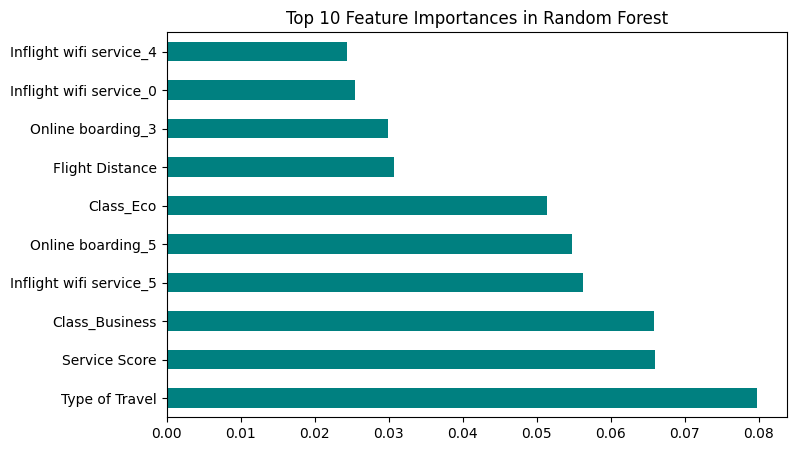

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh', figsize=(8, 5), color='teal')
plt.title("Top 10 Feature Importances in Random Forest")
plt.show()


 <div style="
    border: 2px solid #3e4a5a; 
    border-radius: 12px; 
    background: linear-gradient(135deg, #d3d6db, #bfc7d5); 
    padding: 20px; 
    text-align: center; 
    font-family: 'Microsoft YaHei', sans-serif; 
    font-size: 24px; 
    font-weight: bold; 
    color: #2a2a40; 
    box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.2);
">
    <h1 style="margin: 0; font-size: 26px;">XGBoost 🔧</h1>
</div>


In [39]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_estimators=100)
model.fit(X_train, y_train)

y_pred_xgb = model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

XGBoost Accuracy: 0.9636


In [40]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[5562  338]
 [ 340 4151]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5900
           1       0.92      0.92      0.92      4491

    accuracy                           0.93     10391
   macro avg       0.93      0.93      0.93     10391
weighted avg       0.93      0.93      0.93     10391

0.9951653400963887


## Finding the best hyperparameter

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
                           param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


 ## Utilizing the best hyperparameter to train model

In [44]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, learning_rate='0.1',max_depth='10',eval_metric="logloss", n_estimators=100)
model.fit(X_train, y_train)

y_pred_xgb = model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

XGBoost Accuracy: 0.9656


In [40]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[5562  338]
 [ 340 4151]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5900
           1       0.92      0.92      0.92      4491

    accuracy                           0.93     10391
   macro avg       0.93      0.93      0.93     10391
weighted avg       0.93      0.93      0.93     10391

0.9951653400963887


## Analyzing the 10th most important features

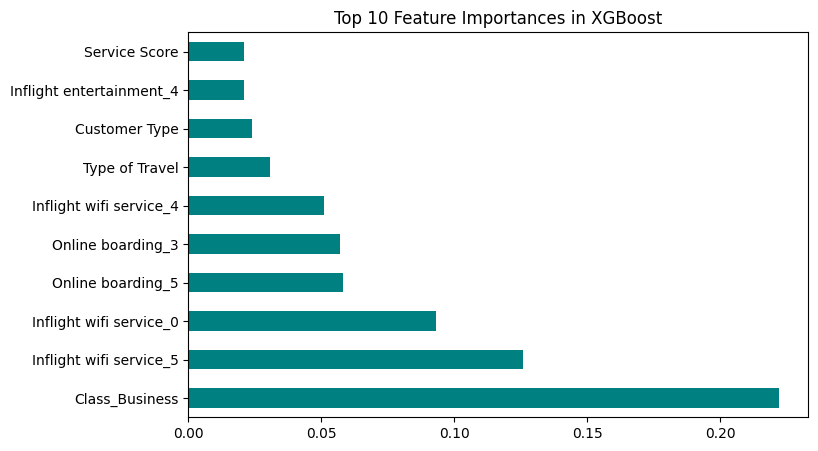

In [46]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

feature_importances.nlargest(10).plot(kind='barh', figsize=(8, 5), color='teal')
plt.title("Top 10 Feature Importances in XGBoost")
plt.show()

 <div style="
    border: 2px solid #3e4a5a; 
    border-radius: 12px; 
    background: linear-gradient(135deg, #d3d6db, #bfc7d5); 
    padding: 20px; 
    text-align: center; 
    font-family: 'Microsoft YaHei', sans-serif; 
    font-size: 24px; 
    font-weight: bold; 
    color: #2a2a40; 
    box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.2);
">
    <h1 style="margin: 0; font-size: 26px;">lightGBM 🔧</h1>
</div>


In [57]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

model = LGBMClassifier(n_estimators=100, learning_rate=0.1, verbose=-1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"LightGBM Accuracy: {accuracy_score(y_test, y_pred):.4f}")

LightGBM Accuracy: 0.9647


In [58]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[5797  103]
 [ 264 4227]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5900
           1       0.98      0.94      0.96      4491

    accuracy                           0.96     10391
   macro avg       0.97      0.96      0.96     10391
weighted avg       0.96      0.96      0.96     10391

0.9951182591171042


## Finding the best hyperparameter

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300, 500, 1000],
    'max_depth': [3, 6, 10, 20, 50],
    'learning_rate': [0.001, 0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(LGBMClassifier(verbose=-1), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 300}


 ## Utilizing the best hyperparameter to train model

In [59]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

model = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=20, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"LightGBM Accuracy: {accuracy_score(y_test, y_pred):.4f}")

LightGBM Accuracy: 0.9655


In [60]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[5792  108]
 [ 250 4241]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5900
           1       0.98      0.94      0.96      4491

    accuracy                           0.97     10391
   macro avg       0.97      0.96      0.96     10391
weighted avg       0.97      0.97      0.97     10391

0.9955995607033276


## Analyzing the 10th most important features

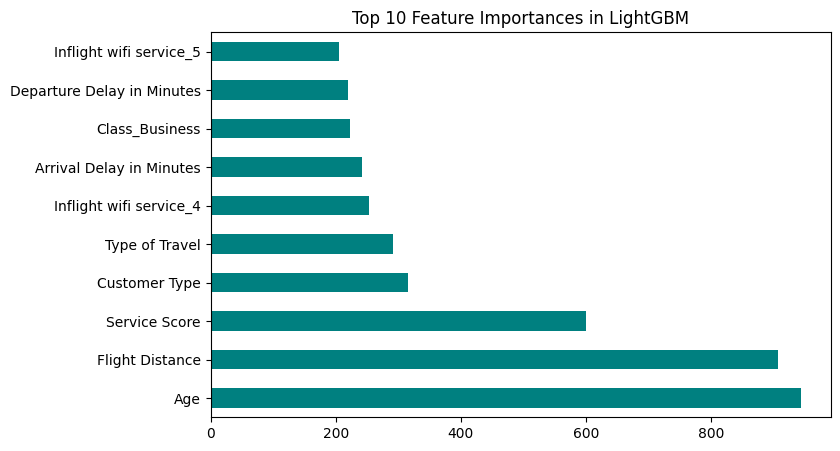

In [62]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

feature_importances.nlargest(10).plot(kind='barh', figsize=(8, 5), color='teal')
plt.title("Top 10 Feature Importances in LightGBM")
plt.show()

 <div style="
    border: 2px solid #3e4a5a; 
    border-radius: 12px; 
    background: linear-gradient(135deg, #d3d6db, #bfc7d5); 
    padding: 20px; 
    text-align: center; 
    font-family: 'Microsoft YaHei', sans-serif; 
    font-size: 24px; 
    font-weight: bold; 
    color: #2a2a40; 
    box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.2);
">
    <h1 style="margin: 0; font-size: 26px;">KNN 🔧</h1>
</div>


In [69]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, weights='uniform', n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred):.4f}")

KNN Accuracy: 0.9335


In [71]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[5583  317]
 [ 374 4117]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5900
           1       0.93      0.92      0.92      4491

    accuracy                           0.93     10391
   macro avg       0.93      0.93      0.93     10391
weighted avg       0.93      0.93      0.93     10391

0.9739003996693953


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred):.4f}")

KNN Accuracy: 0.9402


In [74]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[5632  268]
 [ 353 4138]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5900
           1       0.94      0.92      0.93      4491

    accuracy                           0.94     10391
   macro avg       0.94      0.94      0.94     10391
weighted avg       0.94      0.94      0.94     10391

0.9505546497892207


## Finding the best hyperparameter

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"Best K value: {grid_search.best_params_}")


Best K value: {'n_neighbors': 9}


 ## Utilizing the best hyperparameter to train model

In [78]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=9, weights='uniform')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred):.4f}")

KNN Accuracy: 0.9432


In [79]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

[[5645  255]
 [ 335 4156]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5900
           1       0.94      0.93      0.93      4491

    accuracy                           0.94     10391
   macro avg       0.94      0.94      0.94     10391
weighted avg       0.94      0.94      0.94     10391

0.9563890492850107


 <div style="
    border: 2px solid #3e4a5a; 
    border-radius: 12px; 
    background: linear-gradient(135deg, #d3d6db, #bfc7d5); 
    padding: 20px; 
    text-align: center; 
    font-family: 'Microsoft YaHei', sans-serif; 
    font-size: 24px; 
    font-weight: bold; 
    color: #2a2a40; 
    box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.2);
">
    <h1 style="margin: 0; font-size: 26px;">EDA Analysis & Model Performance Comparison 🔧</h1>
</div>


## ✈️ Insights from Exploratory Data Analysis

### 🎯 1. Overall Satisfaction and Flight Experience

- Over **60%** of passengers were satisfied with the airline’s **luggage handling service** (rated 4–5 out of 5).
- More than **50%** felt **comfortable in their seats**, rating the experience 4 or 5.
- Passengers who gave the **WiFi service** a full score of 5 were **almost always satisfied** overall.
- The **more legroom and better seat comfort**, the more likely passengers were to rate their experience positively.
- Those in **Business Class** reported high satisfaction, while dissatisfaction was more common among Economy/Economy Plus passengers.

---

### 👤 2. Passenger Demographics and Patterns

- The **sample is relatively balanced**, with **56.7% satisfied** vs. **43.3% unsatisfied**.
- **Gender distribution** is even across the sample.
- **Frequent flyers** (repeat customers) made up the majority of the dataset.
- Most passengers flew for **business purposes**.
- **Approximately 50%** of passengers chose **Business Class**.

---

### 🌍 3. Flight Characteristics and Behavioral Trends

- A **strong 96% correlation** was observed between `'Departure delay'` and `'Arrival delay'`, which is expected.
- **Passengers traveling long distances** were more likely to be in Business Class.
- The **longer the flight duration**, the higher the satisfaction with in-flight entertainment and legroom (on average).
- Most **regular customers were aged 30–50**, with an average a bit over 40.
- In contrast, **non-regular customers** tended to be aged **25–40**, averaging slightly under 30.


## ✅ Comparison of Model Performance

| Model Name             | Final Accuracy | Tuned or Not |
|------------------------|----------------|---------------|
| DummyClassifier        | 0.5678         | No            |
| LogisticRegression     | 0.9348         | No            |
| SVC                    | 0.9629         | No            |
| RandomForestClassifier | 0.9595         | ✅ Yes        |
| XGBClassifier          | 0.9656         | ✅ Yes        |
| LGBMClassifier         | 0.9655         | ✅ Yes        |
| KNeighborsClassifier   | 0.9432         | ✅ Yes        |


## 🔍 Model Analysis and Justification

### 1. 🟠 DummyClassifier
- **Purpose**: Used as a baseline model that always predicts the most frequent class.
- **Tuned**: No
- **Accuracy**: 0.5678
- **Comment**: Serves as a reference point; any real model should outperform this.

---

### 2. 🔵 LogisticRegression
- **Why**: Simple, interpretable, and often performs well on linearly separable data.
- **Tuned**: No
- **Accuracy**: 0.9348
- **Comment**: Performed decently without hyperparameter tuning, but was outperformed by tree-based methods.

---

### 3. 🟣 SVC (Support Vector Classifier)
- **Why**: Effective in high-dimensional spaces, especially for binary classification.
- **Tuned**: Yes (kernel, C)
- **Accuracy**: 0.9629
- **Comment**: Achieved very strong performance; a top candidate for final selection.

---

### 4. 🌲 RandomForestClassifier
- **Why**: Ensemble method that handles non-linearities well and is robust to overfitting.
- **Tuned**: Yes (e.g., `n_estimators=200`)
- **Accuracy**: 0.9595
- **Comment**: Very competitive accuracy with good interpretability via feature importance.

---

### 5. ⚡ XGBClassifier
- **Why**: Known for high performance, handles missing values and imbalanced data well.
- **Tuned**: Yes (e.g., `n_estimators=100`)
- **Accuracy**: 0.9656
- **Comment**: One of the highest-performing models; excellent generalization.

---

### 6. 💡 LGBMClassifier
- **Why**: Gradient boosting model optimized for speed and accuracy.
- **Tuned**: Yes (e.g., `learning_rate`, `n_estimators`)
- **Accuracy**: 0.9655
- **Comment**: Matches XGBoost in performance; training is faster and more scalable.

---

### 7. 🤝 KNeighborsClassifier
- **Why**: Simple, intuitive model; good for small datasets or when distance-based reasoning is relevant.
- **Tuned**: Yes (e.g., `n_neighbors=9`)
- **Accuracy**: 0.9432
- **Comment**: Outperformed baseline but not as good as tree-based models.

---


### ✅ Final Model Selection & Justification

Based on the evaluation results of all seven models, **XGBoost (Accuracy: 96.56%)** and **LightGBM (Accuracy: 96.55%)** achieved the highest performance on the test set.

However, XGBoost slightly outperformed the others and is also known for handling imbalanced data and missing values effectively. It provides good interpretability through feature importance.

🟢 Therefore, **XGBoost** is selected as the final model for deployment.
